In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
#url = 'https://twelvedata.com/markets/256458/crypto/huobi/eth-btc/historical-data?start_date=2025-09-01&end_date=2025-09-03&interval=30min'  # Replace with your URL
#tables = pd.read_html(url)
#url1 = 'https://twelvedata.com/markets/256458/crypto/huobi/eth-btc/historical-data?start_date=2025-09-01&end_date=2025-09-03&interval=30min&page=2'
#tables1 = pd.read_html(url1)
##tbls = pd.concat([tables[0], tables1[0]])
#tbls.to_csv('huobi_eth_bts.csv')

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
#ls gdrive/MyDrive/
#%cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [4]:
##huobi trades data for auxiliary graph
tbls = pd.read_csv("huobi_eth_bts.csv")

In [5]:
tbls['timestamp'] = pd.to_datetime(tbls['Date'].values, utc=True)

In [6]:
tbls.head()

Date      Open      High       Low     Close % Change  \
0  Sep 03, 2025 23:30  0.039891  0.039893  0.039827  0.039827   -0.16%   
1  Sep 03, 2025 23:00  0.039893  0.039932  0.039891  0.039891   -0.01%   
2  Sep 03, 2025 22:30  0.039845  0.039893  0.039845  0.039893    0.12%   
3  Sep 03, 2025 22:00  0.039820  0.039968  0.039820  0.039845    0.06%   
4  Sep 03, 2025 21:30  0.039901  0.039901  0.039753  0.039820   -0.20%   

                  timestamp  
0 2025-09-03 23:30:00+00:00  
1 2025-09-03 23:00:00+00:00  
2 2025-09-03 22:30:00+00:00  
3 2025-09-03 22:00:00+00:00  
4 2025-09-03 21:30:00+00:00

In [16]:
#%cd /home

In [7]:
#%pwd

'/content/gdrive/MyDrive/Colab Notebooks'

# Preliminaries

In [20]:
#from google.colab import files

#uploaded = files.upload()

Saving eth-btc-trades.csv to eth-btc-trades.csv
Saving eth-btc-orderbooks.csv to eth-btc-orderbooks.csv


In [7]:
#for k in uploaded:
#  print(k)

In [8]:
#import io
#trds = pd.read_csv(io.StringIO(uploaded['eth-btc-trades.csv'].decode('utf-8')))
#lob    = pd.read_csv(io.StringIO(uploaded['eth-btc-orderbooks.csv'].decode('utf-8')))

In [7]:
trds = pd.read_csv('eth-btc-trades.csv')
lob    = pd.read_csv('eth-btc-orderbooks.csv')

In [8]:
trds.shape, lob.shape

((845, 4), (188, 3))

In [9]:
lob.head()

timestamp  \
0  2025-09-01 00:13:09.511132300+00:00   
1  2025-09-01 00:31:23.134173200+00:00   
2  2025-09-01 00:49:37.173137500+00:00   
3  2025-09-01 01:07:51.274078600+00:00   
4     2025-09-01 01:26:07.248503+00:00   

                                                asks  \
0  [{'price': 0.04100829, 'size': 0.02288708}, {'...   
1  [{'price': 0.04097411, 'size': 0.02047798}, {'...   
2  [{'price': 0.04091134, 'size': 0.02229217}, {'...   
3  [{'price': 0.04103079, 'size': 0.07205901}, {'...   
4  [{'price': 0.04100837, 'size': 0.02019721}, {'...   

                                                bids  
0  [{'price': 0.0405, 'size': 0.00249086}, {'pric...  
1  [{'price': 0.0405, 'size': 0.00249086}, {'pric...  
2  [{'price': 0.0405, 'size': 0.00249086}, {'pric...  
3  [{'price': 0.0405, 'size': 0.00249086}, {'pric...  
4  [{'price': 0.0405, 'size': 0.00249086}, {'pric...

In [10]:
np.unique([len(eval(i)) for i in lob.bids]), np.unique([len(eval(i)) for i in lob.asks])

(array([50]), array([50]))

In [11]:
fun = lambda x: {'ask_'+k+'_'+str(ind): v for ind, d in enumerate(eval(x)) for k, v in d.items()}
df_asks = pd.DataFrame.from_records(lob.asks.apply(fun))

In [12]:
df_asks.head()

ask_price_0  ask_price_1  ask_price_10  ask_price_11  ask_price_12  \
0     0.041008      0.04109       0.04152       0.04157        0.0416   
1     0.040974      0.04109       0.04152       0.04157        0.0416   
2     0.040911      0.04109       0.04152       0.04157        0.0416   
3     0.041031      0.04109       0.04152       0.04157        0.0416   
4     0.041008      0.04109       0.04152       0.04157        0.0416   

   ask_price_13  ask_price_14  ask_price_15  ask_price_16  ask_price_17  ...  \
0       0.04162       0.04167      0.041696        0.0417       0.04172  ...   
1       0.04162       0.04167      0.041696        0.0417       0.04172  ...   
2       0.04162       0.04167      0.041696        0.0417       0.04172  ...   
3       0.04162       0.04167      0.041696        0.0417       0.04172  ...   
4       0.04162       0.04167      0.041696        0.0417       0.04172  ...   

   ask_size_45  ask_size_46  ask_size_47  ask_size_48  ask_size_49  \
0     0.002672     0.000237     0.000237     0.002891     0.000237   
1     0.002672     0.000237     0.000237     0.002891     0.000237   
2     0.002672     0.000237     0.000237     0.002891     0.000237   
3     0.002672     0.000237     0.000237     0.002891     0.000237   
4     0.002672     0.000237     0.000237     0.002891     0.000237   

   ask_size_5  ask_size_6  ask_size_7  ask_size_8  ask_size_9  
0    0.002478    0.005148    0.029822    0.002472    0.056286  
1    0.002478    0.005148    0.029822    0.002472    0.056286  
2    0.002478    0.005148    0.029822    0.002472    0.056286  
3    0.002478    0.005148    0.029822    0.002472    0.056286  
4    0.002478    0.005148    0.029822    0.002472    0.056286  

[5 rows x 100 columns]

In [13]:
fun = lambda x: {'bids_'+k+'_'+str(ind): v for ind, d in enumerate(eval(x)) for k, v in d.items()}
df_bids = pd.DataFrame.from_records(lob.bids.apply(fun))

In [14]:
df_bids.head()

bids_price_0  bids_price_1  bids_price_10  bids_price_11  bids_price_12  \
0        0.0405       0.04049       0.039919         0.0399       0.039809   
1        0.0405       0.04049       0.039919         0.0399       0.039809   
2        0.0405       0.04049       0.039919         0.0399       0.039809   
3        0.0405       0.04049       0.039919         0.0399       0.039809   
4        0.0405       0.04049       0.039919         0.0399       0.039809   

   bids_price_13  bids_price_14  bids_price_15  bids_price_16  bids_price_17  \
0         0.0398         0.0397         0.0395         0.0394       0.039398   
1         0.0398         0.0397         0.0395         0.0394       0.039398   
2         0.0398         0.0397         0.0395         0.0394       0.039398   
3         0.0398         0.0397         0.0395         0.0394       0.039398   
4         0.0398         0.0397         0.0395         0.0394       0.039398   

   ...  bids_size_45  bids_size_46  bids_size_47  bids_size_48  bids_size_49  \
0  ...      0.003381      0.014934      0.003115      0.021893      0.004384   
1  ...      0.003381      0.014934      0.003115      0.021893      0.004384   
2  ...      0.003381      0.014934      0.003115      0.021893      0.004384   
3  ...      0.003381      0.014934      0.003115      0.021893      0.004384   
4  ...      0.003381      0.014934      0.003115      0.021893      0.004384   

   bids_size_5  bids_size_6  bids_size_7  bids_size_8  bids_size_9  
0     0.003156     0.002522     0.013491     0.002794     0.000311  
1     0.003156     0.002522     0.013491     0.002794     0.000311  
2     0.003156     0.002522     0.013491     0.002794     0.000311  
3     0.003156     0.002522     0.013491     0.002794     0.000311  
4     0.003156     0.002522     0.013491     0.002794     0.000311  

[5 rows x 100 columns]

In [15]:
df_bids_asks = pd.concat([df_bids, df_asks], axis=1)
df_bids_asks['timestamp'] = pd.to_datetime(lob.timestamp.values)
df_bids_asks.head()

bids_price_0  bids_price_1  bids_price_10  bids_price_11  bids_price_12  \
0        0.0405       0.04049       0.039919         0.0399       0.039809   
1        0.0405       0.04049       0.039919         0.0399       0.039809   
2        0.0405       0.04049       0.039919         0.0399       0.039809   
3        0.0405       0.04049       0.039919         0.0399       0.039809   
4        0.0405       0.04049       0.039919         0.0399       0.039809   

   bids_price_13  bids_price_14  bids_price_15  bids_price_16  bids_price_17  \
0         0.0398         0.0397         0.0395         0.0394       0.039398   
1         0.0398         0.0397         0.0395         0.0394       0.039398   
2         0.0398         0.0397         0.0395         0.0394       0.039398   
3         0.0398         0.0397         0.0395         0.0394       0.039398   
4         0.0398         0.0397         0.0395         0.0394       0.039398   

   ...  ask_size_46  ask_size_47  ask_size_48  ask_size_49  ask_size_5  \
0  ...     0.000237     0.000237     0.002891     0.000237    0.002478   
1  ...     0.000237     0.000237     0.002891     0.000237    0.002478   
2  ...     0.000237     0.000237     0.002891     0.000237    0.002478   
3  ...     0.000237     0.000237     0.002891     0.000237    0.002478   
4  ...     0.000237     0.000237     0.002891     0.000237    0.002478   

   ask_size_6  ask_size_7  ask_size_8  ask_size_9  \
0    0.005148    0.029822    0.002472    0.056286   
1    0.005148    0.029822    0.002472    0.056286   
2    0.005148    0.029822    0.002472    0.056286   
3    0.005148    0.029822    0.002472    0.056286   
4    0.005148    0.029822    0.002472    0.056286   

                            timestamp  
0 2025-09-01 00:13:09.511132300+00:00  
1 2025-09-01 00:31:23.134173200+00:00  
2 2025-09-01 00:49:37.173137500+00:00  
3 2025-09-01 01:07:51.274078600+00:00  
4    2025-09-01 01:26:07.248503+00:00  

[5 rows x 201 columns]

In [16]:
df_list = []
for i in range(50):
  pr_name = 'bids_price_'+str(i)
  sz_name = 'bids_size_' +str(i)
  df1 = df_bids_asks[['timestamp', pr_name, sz_name]].melt(id_vars=['timestamp', sz_name], value_vars=pr_name)
  df_list.append(df1.rename(columns={sz_name: 'size'}))

df_melt_bids = pd.concat(df_list)

In [17]:
df_list = []
for i in range(50):
  pr_name = 'ask_price_'+str(i)
  sz_name = 'ask_size_' +str(i)
  df1 = df_bids_asks[['timestamp', pr_name, sz_name]].melt(id_vars=['timestamp', sz_name], value_vars=pr_name)
  df_list.append(df1.rename(columns={sz_name: 'size'}))

df_melt_asks = pd.concat(df_list)

In [18]:
df_melt_asks.head()

timestamp      size     variable     value
0 2025-09-01 00:13:09.511132300+00:00  0.022887  ask_price_0  0.041008
1 2025-09-01 00:31:23.134173200+00:00  0.020478  ask_price_0  0.040974
2 2025-09-01 00:49:37.173137500+00:00  0.022292  ask_price_0  0.040911
3 2025-09-01 01:07:51.274078600+00:00  0.072059  ask_price_0  0.041031
4    2025-09-01 01:26:07.248503+00:00  0.020197  ask_price_0  0.041008

In [19]:
df_melt_bids_asks = pd.concat([df_melt_bids, df_melt_asks])

In [20]:
df_melt_bids_asks.shape

(18800, 4)

In [21]:
df_melt_bids_asks.sort_values(by='timestamp', inplace=True)

In [22]:
trds_m = trds.copy()
trds_m['timestamp'] = pd.to_datetime(trds_m.timestamp.values)
trds_m.rename(columns={'price':'value', 'side':'variable'}, inplace=True)
#trds1['size'] = np.log(trds1['size'])
trds_m.head()

timestamp     value       size variable
0 2025-09-01 00:02:57+00:00  0.040800   0.000441     SELL
1 2025-09-01 00:02:57+00:00  0.040700   0.002478     SELL
2 2025-09-01 00:02:57+00:00  0.040700   0.020152     SELL
3 2025-09-01 00:02:57+00:00  0.040600   0.002460     SELL
4 2025-09-01 00:03:14+00:00  0.040812  91.455503      BUY

In [23]:
df_trds_bids_asks = pd.concat([trds_m, df_melt_bids_asks])

/Users/valdemar/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [24]:
df_trds_bids_asks.sort_values(by='timestamp', inplace=True)

In [25]:
df_trds_bids_asks['size_log'] = np.log2(df_trds_bids_asks['size'].values)  -np.log2(np.min(df_trds_bids_asks['size'])) +0.01

In [26]:
df_trds_bids_asks.head()

size                 timestamp     value variable   size_log
0   0.000441 2025-09-01 00:02:57+00:00  0.040800     SELL   9.631725
1   0.002478 2025-09-01 00:02:57+00:00  0.040700     SELL  12.121677
2   0.020152 2025-09-01 00:02:57+00:00  0.040700     SELL  15.145104
3   0.002460 2025-09-01 00:02:57+00:00  0.040600     SELL  12.110856
4  91.455503 2025-09-01 00:03:14+00:00  0.040812      BUY  27.293068

In [27]:
tbls.rename(columns={'Close':'value'}, inplace=True)
tbls.head()

Date      Open      High       Low     value % Change  \
0  Sep 03, 2025 23:30  0.039891  0.039893  0.039827  0.039827   -0.16%   
1  Sep 03, 2025 23:00  0.039893  0.039932  0.039891  0.039891   -0.01%   
2  Sep 03, 2025 22:30  0.039845  0.039893  0.039845  0.039893    0.12%   
3  Sep 03, 2025 22:00  0.039820  0.039968  0.039820  0.039845    0.06%   
4  Sep 03, 2025 21:30  0.039901  0.039901  0.039753  0.039820   -0.20%   

                  timestamp  
0 2025-09-03 23:30:00+00:00  
1 2025-09-03 23:00:00+00:00  
2 2025-09-03 22:30:00+00:00  
3 2025-09-03 22:00:00+00:00  
4 2025-09-03 21:30:00+00:00

In [28]:
tbls['timestamp'] = pd.to_datetime(tbls['Date'].values, utc= True)
tbls = tbls[['timestamp', 'value']]
tbls['size'] = 1.1
tbls.head()

timestamp     value  size
0 2025-09-03 23:30:00+00:00  0.039827   1.1
1 2025-09-03 23:00:00+00:00  0.039891   1.1
2 2025-09-03 22:30:00+00:00  0.039893   1.1
3 2025-09-03 22:00:00+00:00  0.039845   1.1
4 2025-09-03 21:30:00+00:00  0.039820   1.1

In [29]:
tbls['variable'] = 'huobi_close'
tbls['size_log'] = np.log2(tbls['size'])

In [30]:
df_trds_bids_asks_huobi = pd.concat([df_trds_bids_asks, tbls])

/Users/valdemar/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [31]:
df_trds_bids_asks_huobi.sort_values(by = 'timestamp', inplace=True)

# Analysis and conclusion

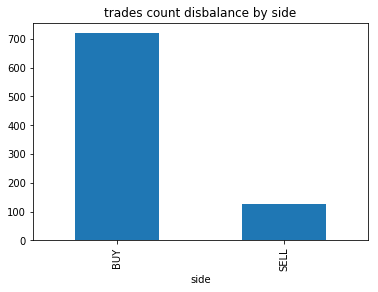

In [75]:
trds.groupby('side').count()['size'].plot(kind='bar', title='trades count disbalance by side')

#### trades  disbalance by side

In [79]:
#trades mean size disbalance by side
trds.groupby('side')['size'].mean()

side
BUY     233.746948
SELL      0.007683
Name: size, dtype: float64

In [95]:
trds[trds['side']=='BUY'].describe()

price          size
count  720.000000  7.200000e+02
mean     0.039853  2.337469e+02
std      0.000641  1.753921e+02
min      0.038920  5.600000e-07
25%      0.039230  9.396000e+01
50%      0.039792  1.881380e+02
75%      0.040169  3.361265e+02
max      0.041031  6.873292e+02

In [96]:
trds[trds['side']=='SELL'].describe()

price        size
count  125.000000  125.000000
mean     0.039702    0.007683
std      0.000553    0.026542
min      0.038800    0.000002
25%      0.039258    0.000323
50%      0.039809    0.001396
75%      0.040079    0.002749
max      0.040961    0.191068

#### Depth volume ask size stat

In [34]:
#Depth volume ask size stat
df_asks.filter(like='size').sum(axis=1).describe()

count    188.000000
mean       1.452942
std       14.565507
min        0.318646
25%        0.348571
50%        0.378867
75%        0.399122
max      200.100935
dtype: float64

In [35]:
#Depth volume bids size stat
df_bids.filter(like='size').sum(axis=1).describe()

count    188.000000
mean       1.531306
std        0.091990
min        1.425538
25%        1.466017
50%        1.507842
75%        1.528932
max        1.798526
dtype: float64

In [89]:
fig = px.scatter(df_melt_bids_asks, title = 'LOB data without trading', x="timestamp", y=[ "value"], color= 'variable')

fig.show()

In [91]:
fig = px.scatter(df_melt_bids_asks.iloc[:np.argmax(df_melt_bids_asks['size'].values)], title = 'LOB data without trading where points are proportional to size(until extremely big ask but small after is the same)', x="timestamp", y=[ "value"], color= 'variable', size='size')

fig.show()

In [42]:
fig = px.scatter(df_trds_bids_asks_huobi[(df_trds_bids_asks_huobi['variable']=='BUY') | (df_trds_bids_asks_huobi['variable']=='SELL') |
                                   (df_trds_bids_asks_huobi['variable']=='bids_price_0') | (df_trds_bids_asks_huobi['variable']=='ask_price_0')].iloc[:], title = 'BID/ASK spread and trades', x="timestamp", y=[ "value"],  color= 'variable')

fig.show()

## Conclusion

We can see that buy trading volume is bigger than sell one by several orders of magnitude and volume of LOB(both sides) as well. And obviously there is no significant (depth)volume of ETH in absolute value in the LOB(smaller than 1 ETH for asks side except one outlier and smaller than 1.8ETH for bids side) and LOB levels are extremly regular(especially bids).
This can be in the case of something like wash trading activity(without another side or may be no data). I think we don't see those extremely big asks levels(that matches the trades) because the best asks instantaneously match with respective non bona fide buy orders but the date is sparse. But there is one big ask order about 199ETH so it seems that this is that non bona fide ask order because it has the same order of magnitude as median.
I think this behavior may pursue several goals. The first and the main(from my point of view) is to emulate big trading activity(volume) of that place for marketing purposes or for rebate, the second is to abuse market participants that market price will go up but anyway there is no such volume in LOB from ask side.(fake arbitrage oportunities).


# Auxiliary

It's interesting that there exist theoretic arbitrage oportunities with Huobi for example. But there is now significant volume to realize that as I've already said. This is another reasion that this is manipulative(wash trading) behaviour. We can see in the graph below. I scrap 30min interval OHLC data from Huobi(as they say) for that purpose.

In [54]:
fig = px.scatter(df_trds_bids_asks_huobi[(df_trds_bids_asks_huobi['variable']=='huobi_close') | (df_trds_bids_asks_huobi['variable']=='BUY') | (df_trds_bids_asks_huobi['variable']=='SELL') |
                                   (df_trds_bids_asks_huobi['variable']=='bids_price_0') | (df_trds_bids_asks_huobi['variable']=='ask_price_0')].iloc[:], title = 'BID/ASK spread, trades and Huobi 30min close', x="timestamp", y=[ "value"],  color= 'variable')

fig.show()